<a href="https://colab.research.google.com/github/AlexBB999/Classwork/blob/master/16_31_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignments**

To close out this checkpoint, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit links to your notebooks below

#**Predicting temperature**

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of this dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

First, load the dataset from the weatherinszeged table from Thinkful's database.

Build a regression model where the target variable is temperature.

As explanatory variables, use humidity, windspeed, windbearing, and pressure. 

Estimate the model using OLS.

Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

Here are the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'

postgres_pw = '7*.8G9QH21'

postgres_host = '142.93.121.174'

postgres_port = '5432'

postgres_db = 'weatherinszeged'

As in earlier assignments, be sure to close the database connection after initially pulling in your data.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

In [0]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

w= pd.read_sql_query('select * from weatherinszeged',con=engine)

In [0]:
w.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


In [0]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [0]:
w.isnull().sum()

date                   0
summary                0
preciptype             0
temperature            0
apparenttemperature    0
humidity               0
windspeed              0
windbearing            0
visibility             0
loudcover              0
pressure               0
dailysummary           0
dtype: int64

In [0]:
Y=w['temperature']

In [0]:
y=w['temperature']

In [0]:
X=w[['humidity','windspeed','windbearing','pressure']]

In [0]:
x=w[['humidity','windspeed','windbearing','pressure']]

In [0]:
X.head()

,humidity,windspeed,windbearing,pressure
0,0.890,14.120,251.000,1015.130
1,0.860,14.265,259.000,1015.630
2,0.890,3.928,204.000,1015.940
3,0.830,14.104,269.000,1016.410
4,0.830,11.045,259.000,1016.510


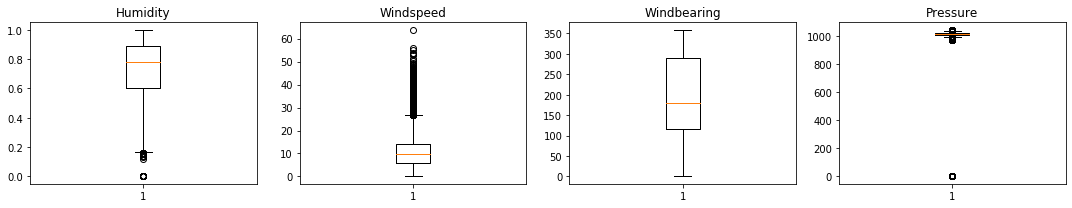

In [0]:
plt.figure(figsize=(15,3))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(1,4,1)
plt.boxplot(w['humidity'])
plt.title("Humidity")

plt.subplot(1,4,2)
plt.boxplot(w['windspeed'])
plt.title("Windspeed")

plt.subplot(1,4,3)
plt.boxplot(w['windbearing'])
plt.title("Windbearing")

plt.subplot(1,4,4)
plt.boxplot(w['pressure'])
plt.title("Pressure")


plt.tight_layout()
plt.show()


**WINSORIZE**

In [0]:
from scipy.stats.mstats import winsorize

In [0]:
w['humidity'] = winsorize(w['humidity'],(.1,.05))
w['windspeed'] = winsorize(w['windspeed'],(.0,.05))
w['windbearing'] = winsorize(w['windbearing'],(.0,.05))
w['pressure'] = winsorize(w['pressure'],(.1,.07))


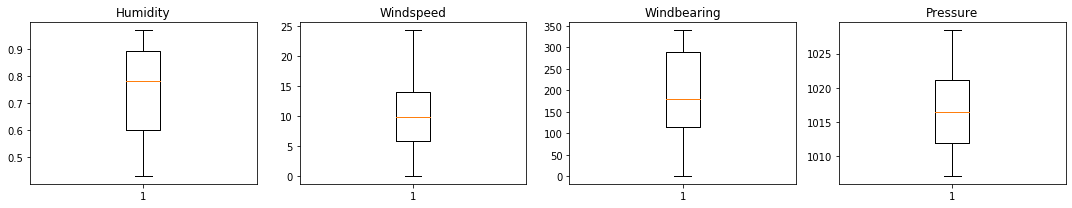

In [0]:
plt.figure(figsize=(15,3))
#plt.subplots_adjust(right=1,top=1,bottom=.2,wspace=2)

plt.subplot(1,4,1)
plt.boxplot(w['humidity'])
plt.title("Humidity")

plt.subplot(1,4,2)
plt.boxplot(w['windspeed'])
plt.title("Windspeed")

plt.subplot(1,4,3)
plt.boxplot(w['windbearing'])
plt.title("Windbearing")

plt.subplot(1,4,4)
plt.boxplot(w['pressure'])
plt.title("Pressure")


plt.tight_layout()
plt.show()


In [0]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                        06:13:03   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""